In [ ]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

In [ ]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**Checking for null values**

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [ ]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes not in ['object']]

In [ ]:
numerical_feature

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [ ]:
df[numerical_feature].head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes  in ['O', 'object'] ]

In [ ]:
df[categorical_feature].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


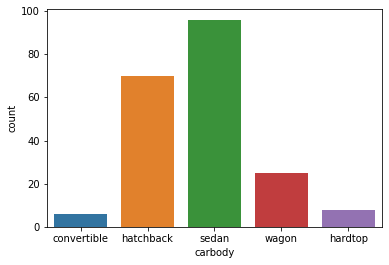

In [ ]:
sns.countplot(x=df['carbody'])

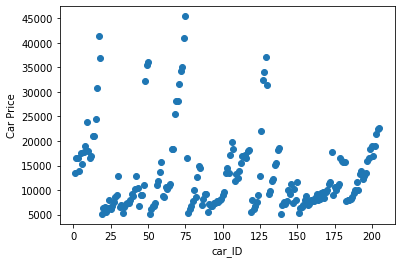

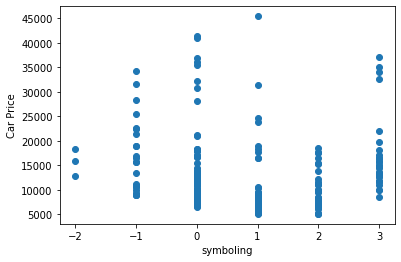

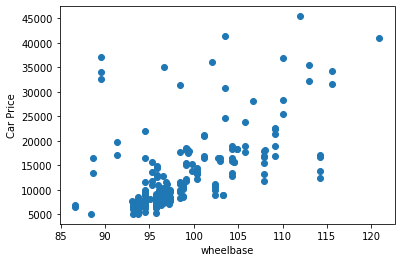

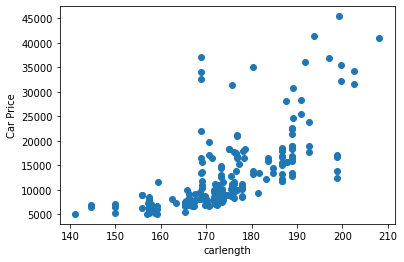

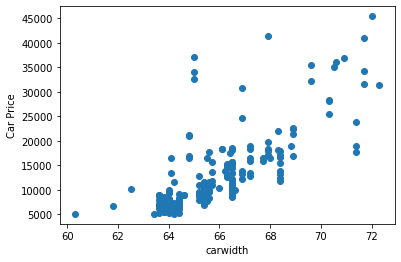

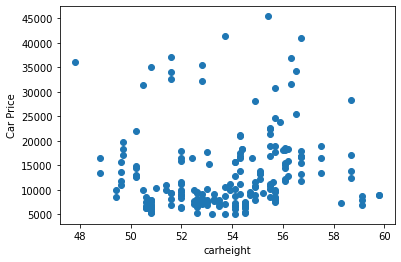

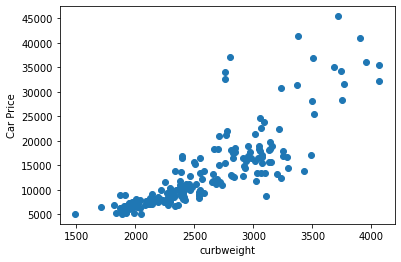

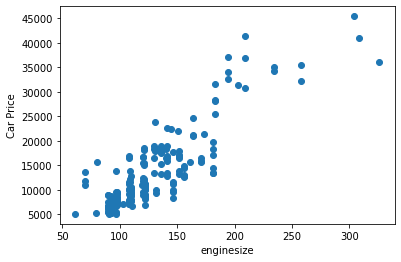

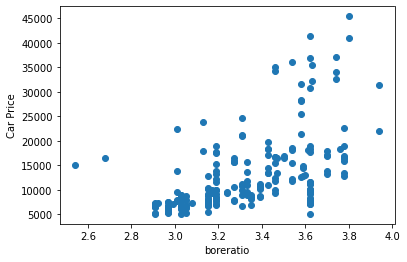

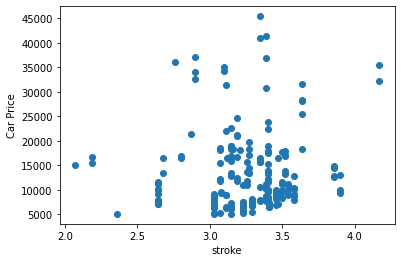

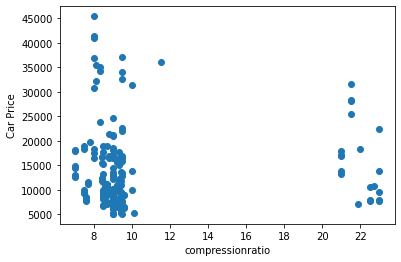

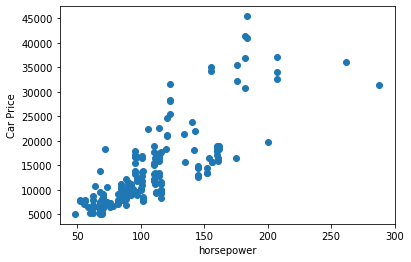

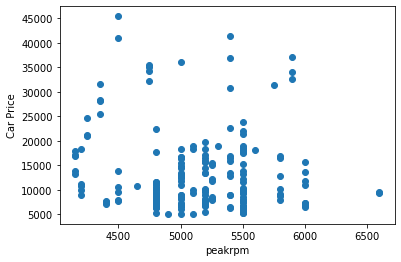

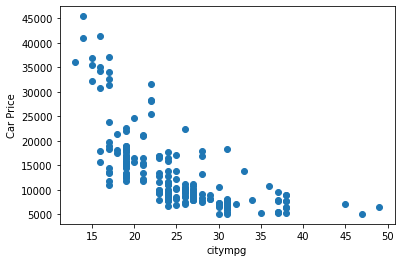

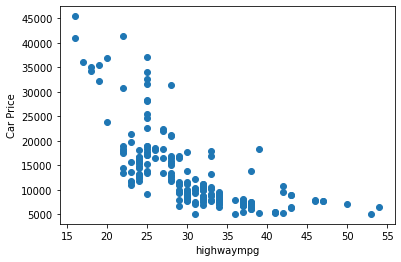

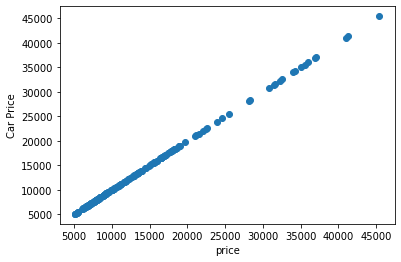

In [ ]:
for feature in numerical_feature:
  if feature not in df['car_ID']:
    plt.scatter(x=df[feature],y=df['price'])
    plt.ylabel("Car Price")
    plt.xlabel(feature)
    plt.show()

In [ ]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes  in ['O', 'object'] ]

In [ ]:
categorical_feature

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

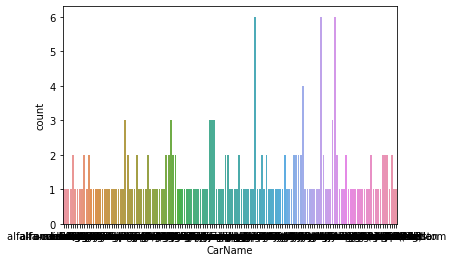

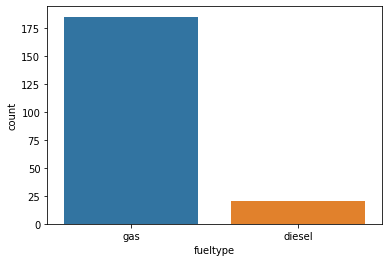

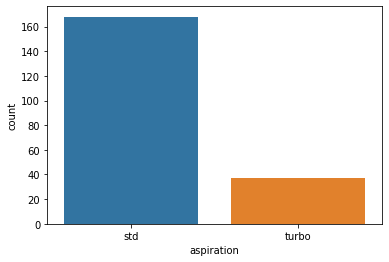

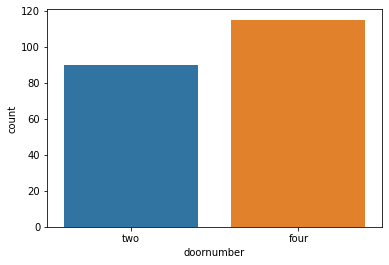

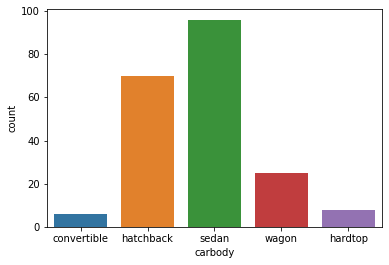

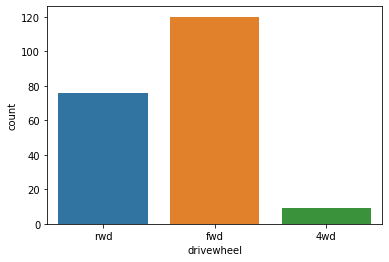

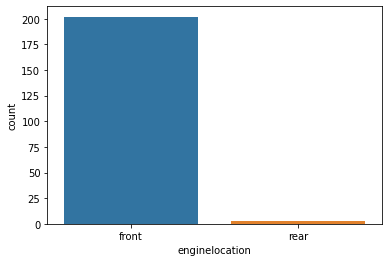

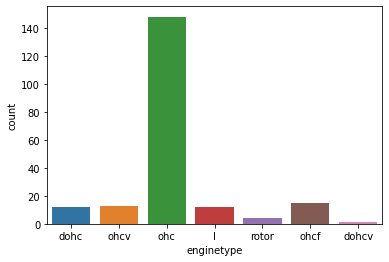

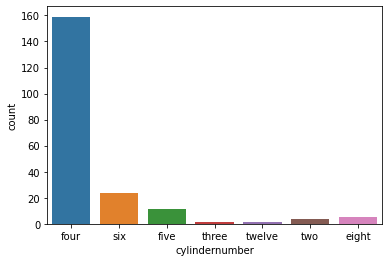

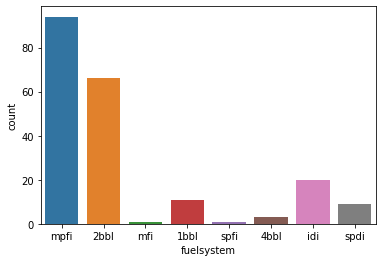

In [ ]:
for features in categorical_feature:
  sns.countplot(x = df[features])
  plt.show()

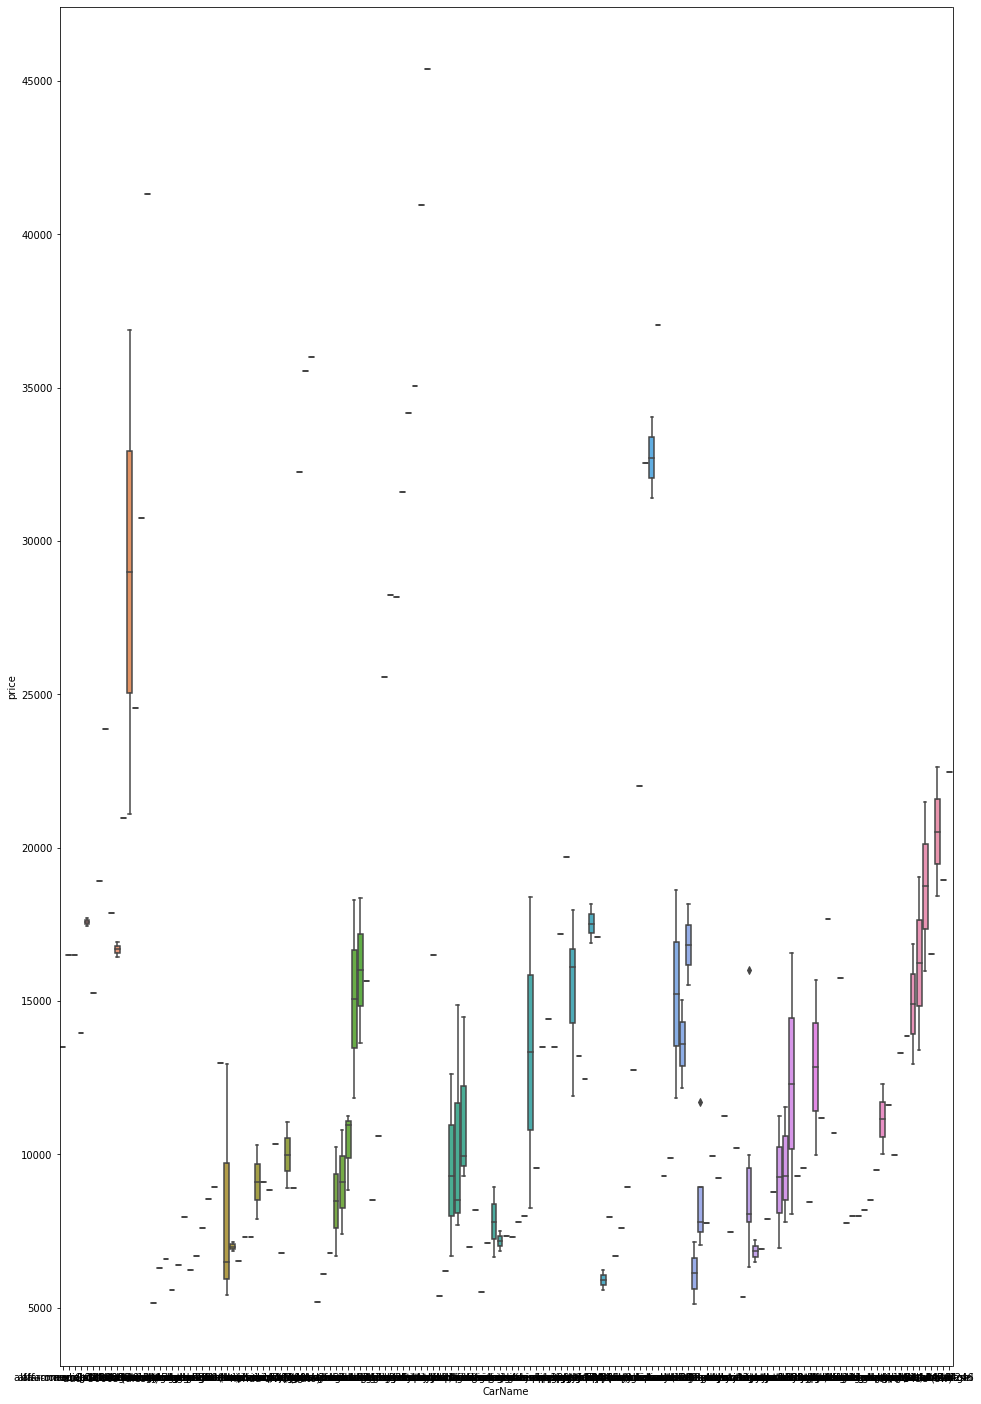

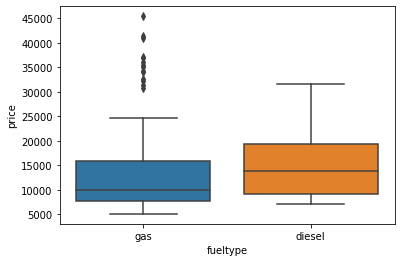

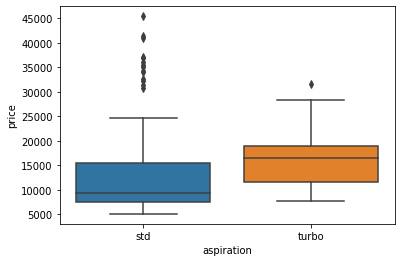

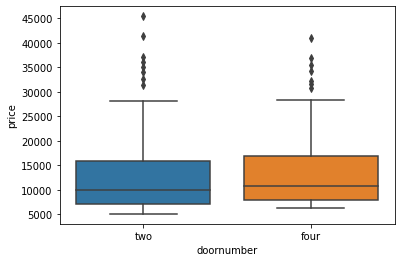

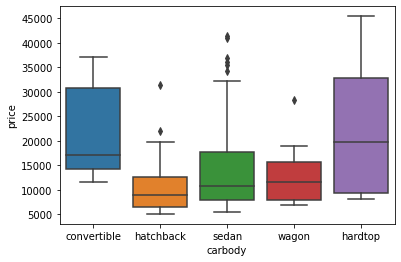

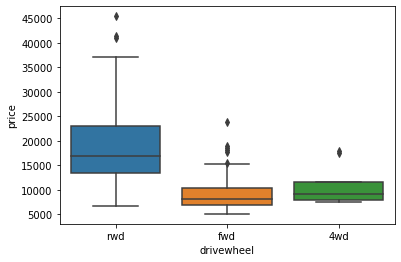

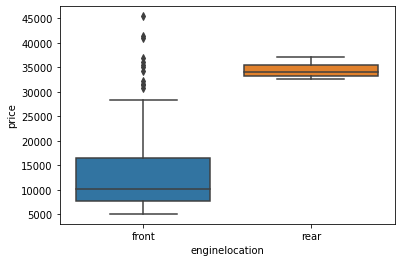

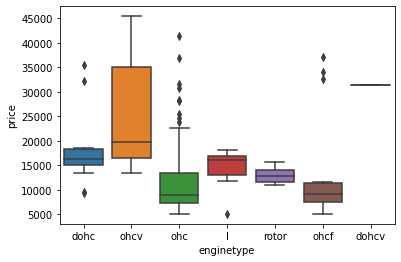

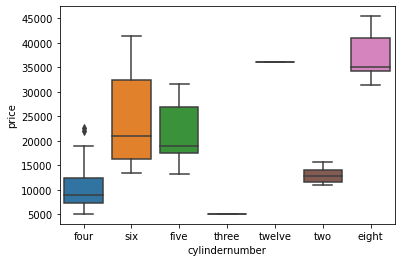

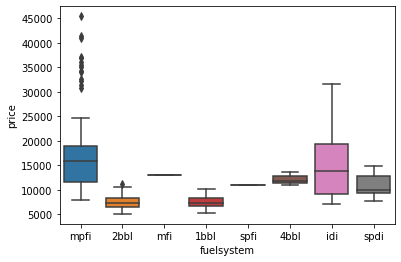

In [ ]:
plt.figure(figsize = (16, 25))
for feature in categorical_feature:
  sns.boxplot(x=df[feature],y=df['price'])
  plt.show()

In [ ]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)

In [ ]:
df.drop(['CarName'],axis=1,inplace=True)

In [ ]:
df['CompanyName']=df['CompanyName'].str.lower()

def replace_name(a,b):
  df['CompanyName'].replace(a,b,inplace=True)

In [ ]:
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [ ]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
df.loc[df.duplicated()]
df.drop(['car_ID'],axis=1,inplace=True)

In [ ]:
df.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.dtypes

symboling             int64
CompanyName          object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

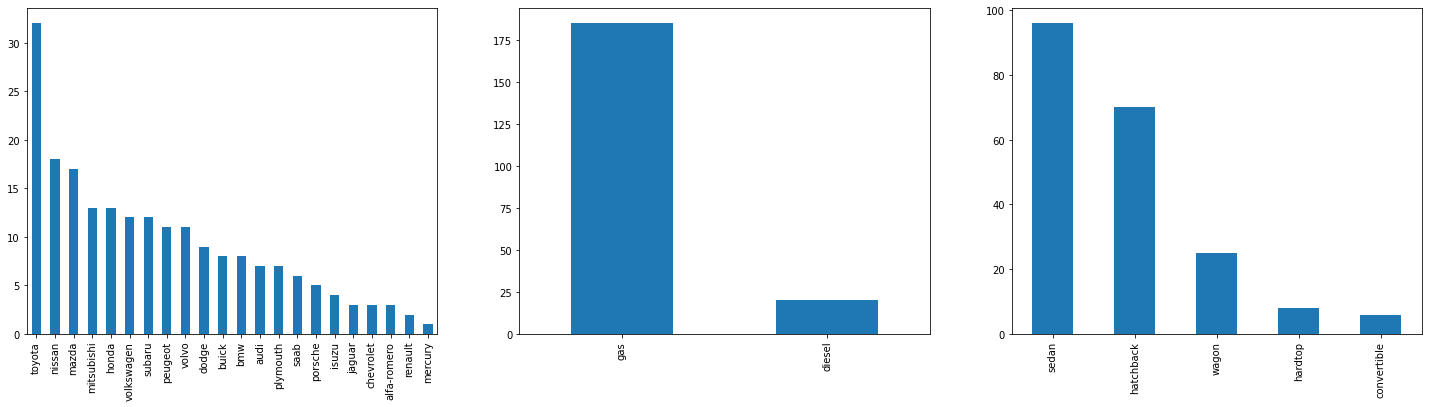

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1=df["CompanyName"].value_counts().plot(kind = 'bar')

plt.subplot(1,3,2)
plt1=df["fueltype"].value_counts().plot(kind = 'bar')

plt.subplot(1,3,3)
plt1 = df["carbody"].value_counts().plot(kind = 'bar')
plt.show()

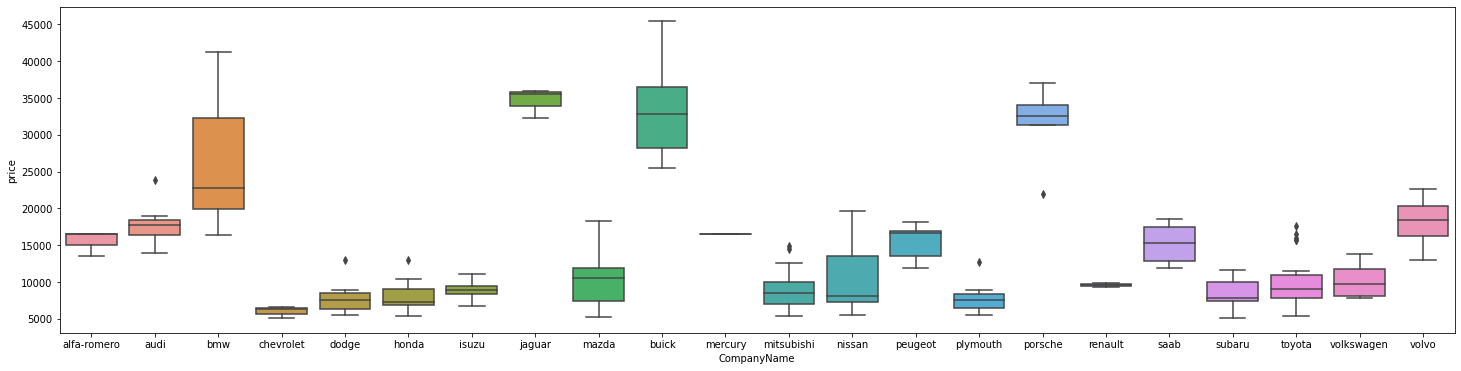

In [ ]:
plt.figure(figsize=(25, 6))
sns.boxplot(x=df['CompanyName'],y=df['price'])

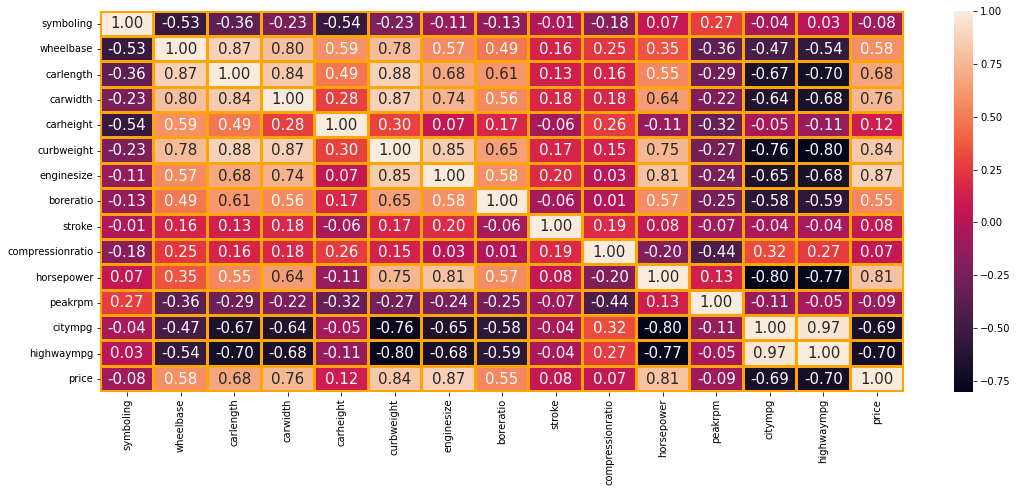

In [ ]:
plt.figure(figsize = (18, 7))
sns.heatmap(df[numerical_feature].corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

Feature Scaling


In [62]:
CompanyName = df[['CompanyName']]
CompanyName=pd.get_dummies(CompanyName, drop_first= True)
CompanyName.head()

,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
fuelsystem = df[['fuelsystem']]
fuelsystem = pd.get_dummies(fuelsystem,drop_first=True)
fuelsystem.head()

,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [64]:
enginetype = df[['enginetype']]
enginetype = pd.get_dummies(enginetype,drop_first=True)
enginetype.head()

,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [65]:
drivewheel = df[['drivewheel']]
drivewheel= pd.get_dummies(drivewheel,drop_first = True)
drivewheel.head()

,drivewheel_fwd,drivewheel_rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [66]:
carbody = df[['carbody']]
carbody = pd.get_dummies(carbody,drop_first=True)
carbody.head()

,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [67]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['fueltype']= label_encoder.fit_transform(df['fueltype'])
df['aspiration']= label_encoder.fit_transform(df['aspiration'])
df['doornumber']= label_encoder.fit_transform(df['doornumber'])
df['enginelocation']= label_encoder.fit_transform(df['enginelocation'])
df['cylindernumber']=  label_encoder.fit_transform(df['cylindernumber'])



In [68]:
df.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,1,0,1,convertible,rwd,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,1,0,1,convertible,rwd,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,1,0,1,hatchback,rwd,0,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,1,0,0,sedan,fwd,0,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,1,0,0,sedan,4wd,0,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [69]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [70]:
X=pd.DataFrame(X)

In [71]:
X = pd.concat([df,CompanyName, fuelsystem , enginetype, drivewheel,carbody], axis = 1)
X.drop(['price'],axis=1,inplace=True)

In [72]:
X.columns

Index(['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 'CompanyName_isuzu',
       'CompanyName_jaguar', 'CompanyName_mazda', 'CompanyName_mercury',
       'CompanyName_mitsubishi', 'CompanyName_nissan', 'CompanyName_peugeot',
       'CompanyName_plymouth', 'CompanyName_porsche', 'CompanyName_renault',
       'CompanyName_saab', 'CompanyName_subaru', 'CompanyName_toyota',
       'CompanyName_volkswagen', 'CompanyName_volvo', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_sp

In [73]:
X.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,3,alfa-romero,1,0,1,convertible,rwd,0,88.6,168.8,...,0,0,0,0,0,1,0,0,0,0
1,3,alfa-romero,1,0,1,convertible,rwd,0,88.6,168.8,...,0,0,0,0,0,1,0,0,0,0
2,1,alfa-romero,1,0,1,hatchback,rwd,0,94.5,171.2,...,0,0,1,0,0,1,0,1,0,0
3,2,audi,1,0,0,sedan,fwd,0,99.8,176.6,...,1,0,0,0,1,0,0,0,1,0
4,2,audi,1,0,0,sedan,4wd,0,99.4,176.6,...,1,0,0,0,0,0,0,0,1,0


In [74]:
X.drop(['CompanyName', 'fuelsystem' , 'enginetype', 'drivewheel','carbody'],axis=1,inplace=True)

In [75]:
X.dtypes

symboling                   int64
fueltype                    int64
aspiration                  int64
doornumber                  int64
enginelocation              int64
wheelbase                 float64
carlength                 float64
carwidth                  float64
carheight                 float64
curbweight                  int64
cylindernumber              int64
enginesize                  int64
boreratio                 float64
stroke                    float64
compressionratio          float64
horsepower                  int64
peakrpm                     int64
citympg                     int64
highwaympg                  int64
CompanyName_audi            uint8
CompanyName_bmw             uint8
CompanyName_buick           uint8
CompanyName_chevrolet       uint8
CompanyName_dodge           uint8
CompanyName_honda           uint8
CompanyName_isuzu           uint8
CompanyName_jaguar          uint8
CompanyName_mazda           uint8
CompanyName_mercury         uint8
CompanyName_mi

In [91]:
X.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,0,1,0,0,1,0,1,0,0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,1,0,0,0,1,0,0,0,1,0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,0,0,0,0,1,0


In [92]:
y= pd.DataFrame(y)

In [93]:
y.head()

,0
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [96]:
X_train.head()




,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
125,3,1,0,1,0,94.5,168.9,68.3,50.2,2778,...,1,0,0,0,0,1,0,1,0,0
42,1,1,0,1,0,96.5,169.1,66.0,51.0,2293,...,1,0,0,0,1,0,0,0,1,0
156,0,1,0,0,0,95.7,166.3,64.4,53.0,2081,...,1,0,0,0,1,0,0,0,1,0
136,3,1,1,1,0,99.1,186.6,66.5,56.1,2808,...,0,0,0,0,1,0,0,1,0,0
140,2,1,0,1,0,93.3,157.3,63.8,55.7,2240,...,0,1,0,0,0,0,0,1,0,0


In [97]:
y_train.shape

(137, 1)

In [98]:
X_test.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
15,0,1,0,0,0,103.5,189.0,66.9,55.7,3230,...,1,0,0,0,0,1,0,0,1,0
9,0,1,1,1,0,99.5,178.2,67.9,52.0,3053,...,1,0,0,0,0,0,0,1,0,0
100,0,1,0,0,0,97.2,173.4,65.2,54.7,2302,...,1,0,0,0,1,0,0,0,1,0
132,3,1,0,1,0,99.1,186.6,66.5,56.1,2658,...,1,0,0,0,1,0,0,1,0,0
68,-1,0,1,0,0,110.0,190.9,70.3,58.7,3750,...,1,0,0,0,0,1,0,0,0,1


In [99]:
y_test.shape

(68, 1)

In [83]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)

In [100]:
# X_train=pd.DataFrame(X_train)
X_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
125,3,1,0,1,0,94.5,168.9,68.3,50.2,2778,...,1,0,0,0,0,1,0,1,0,0
42,1,1,0,1,0,96.5,169.1,66.0,51.0,2293,...,1,0,0,0,1,0,0,0,1,0
156,0,1,0,0,0,95.7,166.3,64.4,53.0,2081,...,1,0,0,0,1,0,0,0,1,0
136,3,1,1,1,0,99.1,186.6,66.5,56.1,2808,...,0,0,0,0,1,0,0,1,0,0
140,2,1,0,1,0,93.3,157.3,63.8,55.7,2240,...,0,1,0,0,0,0,0,1,0,0


In [85]:
# X_test = sc.transform(X_test)

In [101]:
# X_test= pd.DataFrame(X_test)
X_test.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
15,0,1,0,0,0,103.5,189.0,66.9,55.7,3230,...,1,0,0,0,0,1,0,0,1,0
9,0,1,1,1,0,99.5,178.2,67.9,52.0,3053,...,1,0,0,0,0,0,0,1,0,0
100,0,1,0,0,0,97.2,173.4,65.2,54.7,2302,...,1,0,0,0,1,0,0,0,1,0
132,3,1,0,1,0,99.1,186.6,66.5,56.1,2658,...,1,0,0,0,1,0,0,1,0,0
68,-1,0,1,0,0,110.0,190.9,70.3,58.7,3750,...,1,0,0,0,0,1,0,0,0,1


In [102]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [103]:
y_pred = lr_model.predict(X_test)

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_pred, y_test)
r2_score = r2_score(y_pred, y_test)

In [105]:
lr_model.score(X_test, y_test)

0.8811622241596995